In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Split the dataset

In [ ]:
cleaned_df = pd.read_csv("/content/drive/MyDrive/project deliverable 2/data_after_cleaning.csv")
cleaned_df.head(10)

,disc_number,explicit,track_number,album_type,album_total_tracks,acousticness,danceability,energy,key,liveness,...,tempo,valence,year,duration_min,Log_principal_artist_followers,Log_instrumentalness,markets_count,artist_count,genres_count,popularity
0,1,0.0,4,0.0,10,0.70100,0.397,0.207,0.0,0.1160,...,171.282,0.268,1986,3.793333,14.696082,-6.877517,184,1,4,73
1,1,0.0,9,0.0,13,0.01610,0.883,0.553,6.0,0.2280,...,91.753,0.578,1986,3.680667,14.774591,-6.907755,184,1,8,61
2,1,0.0,11,0.0,13,0.00203,0.914,0.586,6.0,0.0992,...,116.371,0.655,1986,2.624000,14.774591,-6.906177,184,1,8,68
3,1,0.0,9,0.0,9,0.00835,0.581,0.791,6.0,0.1420,...,123.887,0.619,1986,4.271550,15.415872,-6.849298,184,1,9,66
4,1,0.0,1,0.0,20,0.29400,0.685,0.594,2.0,0.3580,...,121.761,0.853,1986,3.069333,14.089536,-6.904072,15,1,9,63
5,1,0.0,1,0.0,10,0.10100,0.608,0.768,1.0,0.0942,...,132.699,0.748,1986,3.519333,13.645847,-6.906346,184,1,8,72
6,1,0.0,6,0.0,10,0.07040,0.401,0.901,1.0,0.5380,...,134.799,0.839,1986,3.222000,15.297645,-6.907755,184,1,5,74
7,1,0.0,1,0.0,8,0.04270,0.696,0.780,5.0,0.2980,...,98.699,0.954,1986,5.858433,13.814092,-1.897120,184,1,7,67
8,1,0.0,1,0.0,8,0.18600,0.617,0.931,0.0,0.1710,...,131.014,0.849,1986,3.467100,14.947869,-5.929429,183,1,9,65
9,1,0.0,1,0.0,9,0.00658,0.913,0.596,11.0,0.0780,...,127.215,0.973,1986,4.535550,13.535629,-5.405903,184,1,6,71


In [ ]:
cleaned_df=cleaned_df.drop(columns=['energy','explicit'])

In [ ]:
df_X = cleaned_df.drop(columns=['popularity'])
df_Y = cleaned_df['popularity'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of test data: {X_test.shape}")

Shape of training data: (9061, 20)
Shape of test data: (2266, 20)


## Standardize data

In [ ]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create and train the Decision Tree regressor
regressor = DecisionTreeRegressor(max_depth=17,random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('Testing Result:')
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Training Result:
Mean Squared Error (MSE): 3.685613842992112
Mean Absolute Error (MAE): 0.8363222276431407
Coefficient of Determination (R-squared): 0.9576375359545624
Testing Result:
Mean Squared Error (MSE): 68.37242046687963
Mean Absolute Error (MAE): 6.332298334918587
Coefficient of Determination (R-squared): 0.20760710247507308


In [ ]:
print("predictions for the first ten test data: ", y_pred[:10])
print("real labels for the first ten test data: ", y_test.tolist()[:10])

predictions for the first ten test data:  [72.         71.         85.         65.81818182 77.         64.
 60.52173913 61.         73.         73.        ]
real labels for the first ten test data:  [65, 72, 74, 73, 84, 75, 62, 61, 72, 63]


#### Visualization

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
# Visualize the trained Decision Tree
plt.figure(figsize=(30, 30))
plot_tree(regressor, filled=True)
plt.title("Decision Tree Regression")
plt.show()

NotFittedError: ignored

<Figure size 3000x3000 with 0 Axes>

#### Feature importance

In [ ]:
importances = regressor.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

                           Feature  Importance
13                            year    0.516134
15  Log_principal_artist_followers    0.090612
17                   markets_count    0.044479
14                    duration_min    0.039664
11                           tempo    0.033066
10                     speechiness    0.032475
7                         liveness    0.031416
12                         valence    0.030645
4                     acousticness    0.030140
8                         loudness    0.027431
5                     danceability    0.026406
16            Log_instrumentalness    0.022299
3               album_total_tracks    0.018756
1                     track_number    0.018222
6                              key    0.015989
19                    genres_count    0.012411
18                    artist_count    0.003785
9                             mode    0.003376
2                       album_type    0.002617
0                      disc_number    0.000079


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create and train the Random Forest regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, , '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Test Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Training Result:
Mean Squared Error (MSE): 5.0048001744637185
Mean Absolute Error (MAE): 1.7604237023139462
Coefficient of Determination (R-squared): 0.9424748016267496
Test Result:
Mean Squared Error (MSE): 36.82615492179072
Mean Absolute Error (MAE): 4.856529861724036
Coefficient of Determination (R-squared): 0.5732082701779573


In [ ]:
print("predictions for the first ten test data: ", y_pred[:10])
print("real labels for the first ten test data: ", y_test.tolist()[:10])

predictions for the first ten test data:  [72.72 76.16 80.57 63.75 77.87 68.68 66.09 62.02 68.06 66.6 ]
real labels for the first ten test data:  [65, 72, 74, 73, 84, 75, 62, 61, 72, 63]


In [ ]:
params={'n_estimators':[80,90,100,110,120,130],
'max_features':[0.1,0.3,0.6,0.9,1.0],
        'max_depth':[5,10,12,14,16,18]}
gscv=GridSearchCV(RandomForestRegressor(random_state=42),
param_grid=params, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,
refit=True
)
gscv.fit(X_train,y_train)
print(gscv.best_params_)

In [ ]:
# Create and train the Random Forest regressor
regressor = RandomForestRegressor(max_features=gscv.best_params_['max_features'],n_estimators=gscv.best_params_['n_estimators'],max_depth=gscv.best_params_['max_depth'])
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, , '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Test Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

#### Feature importance

In [ ]:
importances = regressor.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Test Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Training Result:
Mean Squared Error (MSE): 39.561404446728545
Mean Absolute Error (MAE): 5.0602222903678955
Coefficient of Determination (R-squared): 0.5452810183442919 

Test Result:
Mean Squared Error (MSE): 41.28696702135081
Mean Absolute Error (MAE): 5.208893391377566
Coefficient of Determination (R-squared): 0.5215102931172075


In [ ]:
print("predictions for the first ten test data: ", y_pred[:10])
print("real labels for the first ten test data: ", y_test.tolist()[:10])

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
gscv=GridSearchCV(Ridge(random_state=42), param_grid=[{"alpha":np.logspace(-3,3,10)}],
cv=5,scoring='neg_mean_squared_error',n_jobs=-1,
refit=True,return_train_score=True)
gscv.fit(X_train,y_train)
print(gscv.best_params_)

In [ ]:
regressor = Ridge(gscv.best_params_['alpha'])
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

#### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
gscv=GridSearchCV(Lasso(random_state=42), param_grid=[{"alpha":np.logspace(-3,3,10)}],
cv=5,scoring='neg_mean_squared_error',n_jobs=-1,
refit=True,return_train_score=True)
gscv.fit(X_train,y_train)
print(gscv.best_params_)

In [ ]:
regressor = Lasso(gscv.best_params_['alpha'])
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Training Result:
Mean Squared Error (MSE): 39.57028311780303
Mean Absolute Error (MAE): 5.061785461921623
Coefficient of Determination (R-squared): 0.545178966854313
Mean Squared Error (MSE): 41.343823447688806
Mean Absolute Error (MAE): 5.211845288832302
Coefficient of Determination (R-squared): 0.5208513632723779



#### Elastic-net

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
gscv=GridSearchCV(ElasticNet(random_state=42), param_grid=[{"alpha":np.logspace(-3,3,10),
                                                            "l1_ratio":np.logspace(-2,0,10)}],
cv=5,scoring='neg_mean_squared_error',n_jobs=-1,
refit=True,return_train_score=True)
gscv.fit(X_train,y_train)
print(gscv.best_params_)

{'alpha': 0.021544346900318832, 'l1_ratio': 1.0}


In [ ]:
regressor = ElasticNet(alpha=gscv.best_params_['alpha'],l1_ratio=gscv.best_params_['l1_ratio'])
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Training Result:
Mean Squared Error (MSE): 39.57028311780303
Mean Absolute Error (MAE): 5.061785461921623
Coefficient of Determination (R-squared): 0.545178966854313
Mean Squared Error (MSE): 41.343823447688806
Mean Absolute Error (MAE): 5.211845288832302
Coefficient of Determination (R-squared): 0.5208513632723779


#### Feature importance

In [ ]:
# importances = regressor.feature_importances_
# Get the feature importance (coefficients)
feature_importance = np.abs(regressor.coef_)

# Normalize the feature importance
importances /= np.max(feature_importance)

feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

                           Feature  Importance
13                            year    0.072131
15  Log_principal_artist_followers    0.025517
17                   markets_count    0.011112
8                         loudness    0.009586
3               album_total_tracks    0.007446
14                    duration_min    0.007128
10                     speechiness    0.006838
12                         valence    0.006465
5                     danceability    0.006380
4                     acousticness    0.006275
11                           tempo    0.006124
7                         liveness    0.006038
16            Log_instrumentalness    0.004479
19                    genres_count    0.004439
1                     track_number    0.003774
6                              key    0.003658
2                       album_type    0.003248
18                    artist_count    0.000944
9                             mode    0.000855
0                      disc_number    0.000070


## SVM

In [ ]:
from sklearn.svm import SVR

#### linear kernel

In [ ]:
gscv=GridSearchCV(SVR(kernel='linear'), param_grid=[{
                                      "C":np.logspace(-2,5,7)}],
cv=5,scoring='neg_mean_squared_error',n_jobs=-1,
refit=True,return_train_score=True)
gscv.fit(X_train,y_train)
print(gscv.best_params_)

In [ ]:
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 42.44247646567016
Mean Absolute Error (MAE): 5.1991246845820625
Coefficient of Determination (R-squared): 0.508118673068519


In [ ]:
coefficients = regressor.coef_[0]
importances = coefficients

feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

                           Feature  Importance
15                            year    5.460226
17  Log_principal_artist_followers    2.266351
19                   markets_count    2.000834
3                       album_type    0.415480
6                     danceability    0.369284
20                    artist_count    0.233864
5                     acousticness    0.160136
7                           energy    0.048401
4               album_total_tracks    0.027563
0                      disc_number   -0.004977
13                           tempo   -0.005341
14                         valence   -0.007162
18            Log_instrumentalness   -0.087773
10                        loudness   -0.100817
8                              key   -0.145778
9                         liveness   -0.145801
16                    duration_min   -0.169757
1                         explicit   -0.254457
11                            mode   -0.272535
2                     track_number   -0.320716
12           

#### rbf kernel

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

# Evaluate the model's performance

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae=mean_absolute_error(y_train,y_pred)
print("Training Result:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2, '\n')

# Make predictions on the test set
y_pred = regressor.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 41.62414803907989
Mean Absolute Error (MAE): 5.1345663668936385
Coefficient of Determination (R-squared): 0.5176025794249861


In [ ]:
# Retrieve the indices of the support vectors
support_vector_indices = regressor.support_
# Retrieve the support vectors and feature names
support_vectors = regressor.support_vectors_

average_values = np.mean(support_vectors, axis=0)

importances = average_values

feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

# Gradient Boosted Trees

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def print_metrics(model, X, y, dataset_split):
    pred = model.predict(X)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    print('\n',dataset_split)
    print('mean_absolute_error : ', mae)
    print('Mean Squared Error : ', mse)
    print("R-squared : ", r2)


 Train
mean_absolute_error :  4.39545630377237
Mean Squared Error :  30.25711250494342
R-squared :  0.6522245967122688

 Test
mean_absolute_error :  4.950264822142585
Mean Squared Error :  37.190224104975414
R-squared :  0.5689889397375058


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'n_estimators':[70,80,90,100,110,120,130],
        'learning_rate':[1.0,0.9,0.85,0.5,0.4,0.25,0.1,0.05],
      'max_depth':[2,4,6,8,10,12],
        'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
gscv=GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=params,
cv=5, scoring='neg_mean_squared_error',n_jobs=-1,
refit=True)
gscv.fit(X_train, y_train)
print("The best para for GBC:",gscv.best_params_)

In [ ]:
print_metrics(gscv, X_train, y_train, 'Train')
print_metrics(gscv, X_test, y_test, 'Test')

# XG boost


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor


In [ ]:
params={'max_iter':[30, 50, 70],
        'learning_rate':[1.0,0.5,0.1],
      'max_depth':[2,4,12]}
gscv=GridSearchCV(XGBRegressor(random_state=42), param_grid=params,
cv=5, scoring='neg_mean_squared_error',n_jobs=-1,
refit=True)
gscv.fit(X_train, y_train)
print("The best para for GBC:",gscv.best_params_)

The best para for GBC: {'learning_rate': 0.1, 'max_depth': 4, 'max_iter': 30}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:47:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print_metrics(gscv, X_train, y_train, 'Train')
print_metrics(gscv, X_test, y_test, 'Test')


 Train
mean_absolute_error :  4.39545630377237
Mean Squared Error :  30.25711250494342
R-squared :  0.6522245967122688

 Test
mean_absolute_error :  4.950264822142585
Mean Squared Error :  37.190224104975414
R-squared :  0.5689889397375058


# Histogram Boost



In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'max_iter':[30],
        'learning_rate':[0.05],
      'max_depth':[2],
        'max_leaf_nodes':[25]}
gscv=GridSearchCV(HistGradientBoostingRegressor(random_state=42), param_grid=params,
cv=5, scoring='neg_mean_squared_error',n_jobs=-1,
refit=True)
gscv.fit(X_train, y_train)
print("The best para for GBC:",gscv.best_params_)

In [ ]:
print_metrics(gscv, X_train, y_train, 'Train')
print_metrics(gscv, X_test, y_test, 'Test')

### DNN

Epoch 1/20
255/255 [==============================] - 2s 5ms/step - loss: 4321.7300 - mae: 65.0713 - val_loss: 3795.0955 - val_mae: 60.9299
Epoch 2/20
255/255 [==============================] - 1s 3ms/step - loss: 3037.2292 - mae: 54.2696 - val_loss: 2130.2153 - val_mae: 45.3447
Epoch 3/20
255/255 [==============================] - 1s 2ms/step - loss: 1369.8010 - mae: 35.2961 - val_loss: 726.4557 - val_mae: 24.7796
Epoch 4/20
255/255 [==============================] - 1s 2ms/step - loss: 428.5231 - mae: 17.7017 - val_loss: 241.4948 - val_mae: 12.4261
Epoch 5/20
255/255 [==============================] - 1s 2ms/step - loss: 184.9848 - mae: 10.6295 - val_loss: 161.2654 - val_mae: 9.7334
Epoch 6/20
255/255 [==============================] - 1s 3ms/step - loss: 147.1486 - mae: 9.3144 - val_loss: 143.2828 - val_mae: 9.2021
Epoch 7/20
255/255 [==============================] - 2s 7ms/step - loss: 133.6965 - mae: 8.8449 - val_loss: 130.5441 - val_mae: 8.8102
Epoch 8/20
255/255 [==============

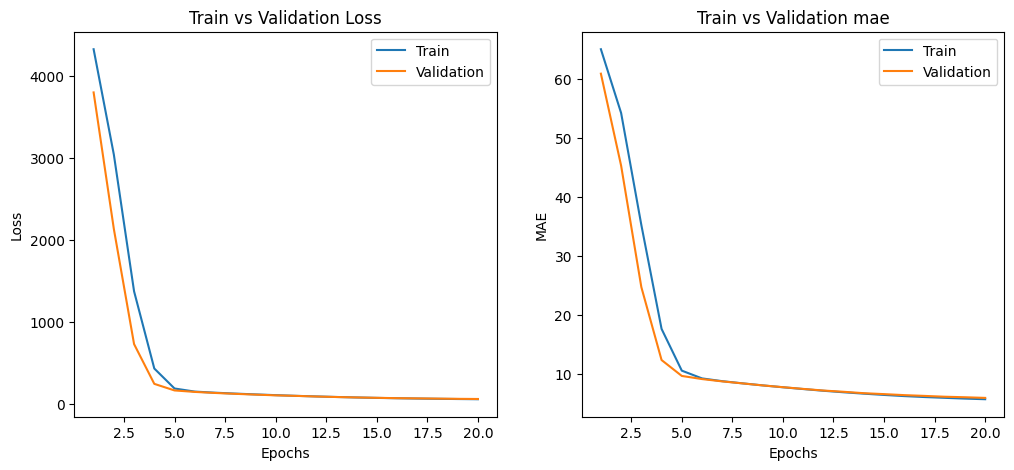

Epoch 1/20
128/128 [==============================] - 1s 4ms/step - loss: 4516.3755 - mae: 66.5510 - val_loss: 4267.0669 - val_mae: 64.6138
Epoch 2/20
128/128 [==============================] - 0s 3ms/step - loss: 4003.9224 - mae: 62.5583 - val_loss: 3634.5168 - val_mae: 59.4833
Epoch 3/20
128/128 [==============================] - 0s 2ms/step - loss: 3257.0249 - mae: 56.2529 - val_loss: 2766.8931 - val_mae: 51.6753
Epoch 4/20
128/128 [==============================] - 0s 3ms/step - loss: 2339.4263 - mae: 47.3148 - val_loss: 1826.4487 - val_mae: 41.4602
Epoch 5/20
128/128 [==============================] - 0s 3ms/step - loss: 1459.5574 - mae: 36.6474 - val_loss: 1047.8561 - val_mae: 30.4356
Epoch 6/20
128/128 [==============================] - 0s 3ms/step - loss: 805.3163 - mae: 26.0511 - val_loss: 555.4099 - val_mae: 20.7431
Epoch 7/20
128/128 [==============================] - 0s 4ms/step - loss: 430.6724 - mae: 17.7298 - val_loss: 320.1718 - val_mae: 14.5187
Epoch 8/20
128/128 [====

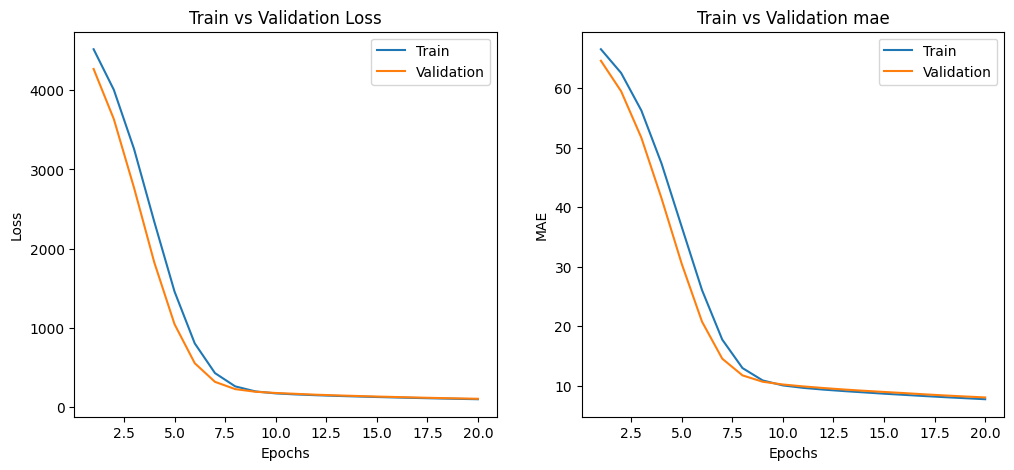

Epoch 1/20
64/64 [==============================] - 1s 5ms/step - loss: 4572.1016 - mae: 66.9492 - val_loss: 4446.8003 - val_mae: 65.9976
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 4346.6323 - mae: 65.2401 - val_loss: 4199.7637 - val_mae: 64.0941
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 4072.9155 - mae: 63.1028 - val_loss: 3891.9475 - val_mae: 61.6444
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 3735.6990 - mae: 60.3717 - val_loss: 3520.7856 - val_mae: 58.5509
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 3337.6069 - mae: 56.9758 - val_loss: 3094.8652 - val_mae: 54.7708
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 2891.2217 - mae: 52.8952 - val_loss: 2629.5300 - val_mae: 50.3022
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 2415.2625 - mae: 48.1473 - val_loss: 2147.0349 - val_mae: 45.2012
Epoch 8/20
64/64 [================

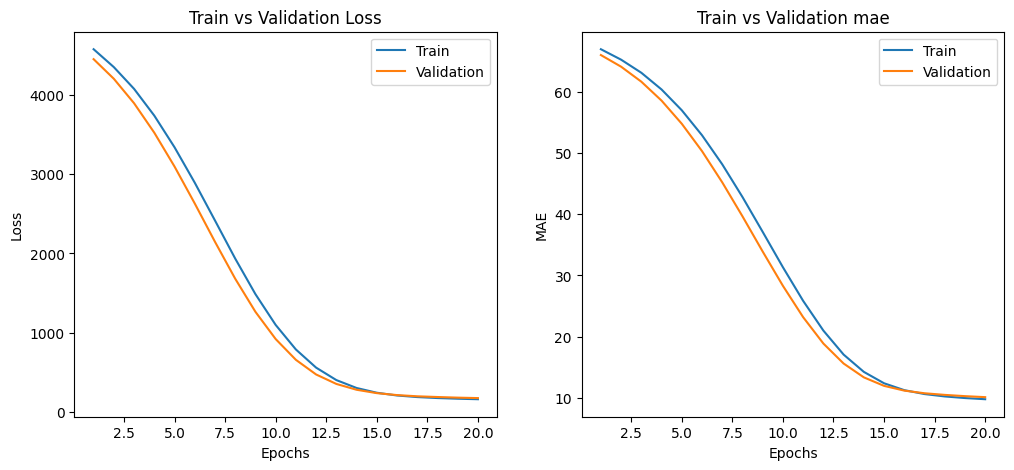

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# small size NN

epochs = 20
BATCH_SIZES = [32, 64, 128]

for BATCH_SIZE in BATCH_SIZES:
  model = Sequential([
    Dense(32, input_shape=(20,) ,activation='relu'),
    Dense(1, activation='linear')
])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  history = model.fit(
      X_train, y_train,
      epochs=epochs,
      batch_size=BATCH_SIZE,
      validation_split =.1
  )

  import matplotlib.pyplot as plt
  # Record loss and accuracy for train and validation sets
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  train_acc = history.history['mae']
  val_acc = history.history['val_mae']

  # Plot train vs validation loss over each epoch
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, epochs + 1), train_loss, label='Train')
  plt.plot(range(1, epochs + 1), val_loss, label='Validation')
  plt.title('Train vs Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot train vs validation accuracy over each epoch
  plt.subplot(1, 2, 2)
  plt.plot(range(1, epochs + 1), train_acc, label='Train')
  plt.plot(range(1, epochs + 1), val_acc, label='Validation')
  plt.title('Train vs Validation mae')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.legend()

  plt.show()

Epoch 1/20
255/255 [==============================] - 4s 8ms/step - loss: 4540.3589 - mae: 66.8763 - val_loss: 4230.0161 - val_mae: 64.6824
Epoch 2/20
255/255 [==============================] - 1s 4ms/step - loss: 3831.0850 - mae: 61.4332 - val_loss: 3258.9192 - val_mae: 56.7125
Epoch 3/20
255/255 [==============================] - 1s 4ms/step - loss: 2734.9294 - mae: 51.6825 - val_loss: 2118.7610 - val_mae: 45.5811
Epoch 4/20
255/255 [==============================] - 1s 5ms/step - loss: 1601.3081 - mae: 39.1971 - val_loss: 1089.2637 - val_mae: 32.3765
Epoch 5/20
255/255 [==============================] - 1s 5ms/step - loss: 750.6793 - mae: 26.2059 - val_loss: 440.7060 - val_mae: 20.0014
Epoch 6/20
255/255 [==============================] - 1s 5ms/step - loss: 282.4767 - mae: 15.0541 - val_loss: 147.5620 - val_mae: 10.4142
Epoch 7/20
255/255 [==============================] - 1s 4ms/step - loss: 101.7827 - mae: 8.0819 - val_loss: 58.2480 - val_mae: 5.8056
Epoch 8/20
255/255 [=========

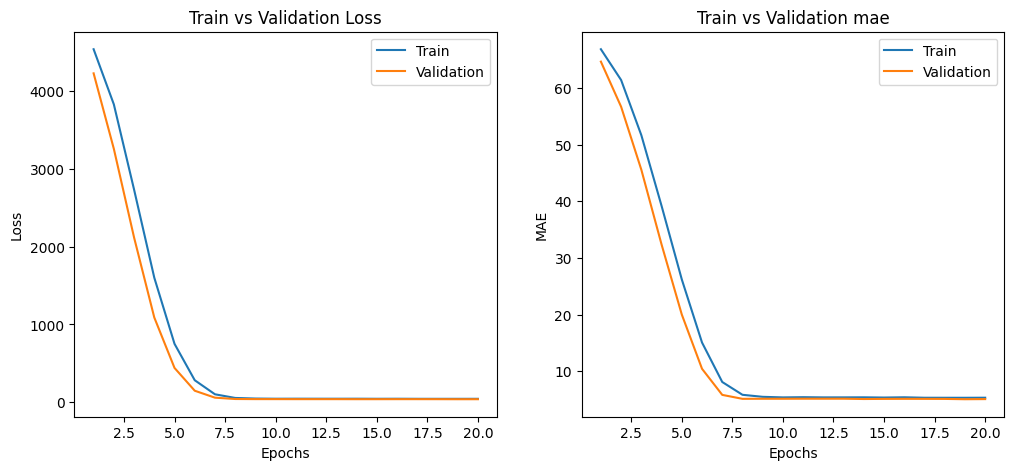

Epoch 1/30
128/128 [==============================] - 3s 8ms/step - loss: 4633.4883 - mae: 67.5278 - val_loss: 4528.6895 - val_mae: 66.8589
Epoch 2/30
128/128 [==============================] - 1s 5ms/step - loss: 4385.2148 - mae: 65.8214 - val_loss: 4210.9419 - val_mae: 64.5518
Epoch 3/30
128/128 [==============================] - 0s 4ms/step - loss: 4009.8591 - mae: 62.9270 - val_loss: 3730.1824 - val_mae: 60.7277
Epoch 4/30
128/128 [==============================] - 0s 3ms/step - loss: 3518.1846 - mae: 58.8844 - val_loss: 3163.0027 - val_mae: 55.8633
Epoch 5/30
128/128 [==============================] - 1s 4ms/step - loss: 2949.4541 - mae: 53.8352 - val_loss: 2588.9443 - val_mae: 50.4681
Epoch 6/30
128/128 [==============================] - 0s 3ms/step - loss: 2356.5625 - mae: 47.9985 - val_loss: 2003.0786 - val_mae: 44.2911
Epoch 7/30
128/128 [==============================] - 0s 3ms/step - loss: 1786.7959 - mae: 41.6429 - val_loss: 1473.2422 - val_mae: 37.8479
Epoch 8/30
128/128 [

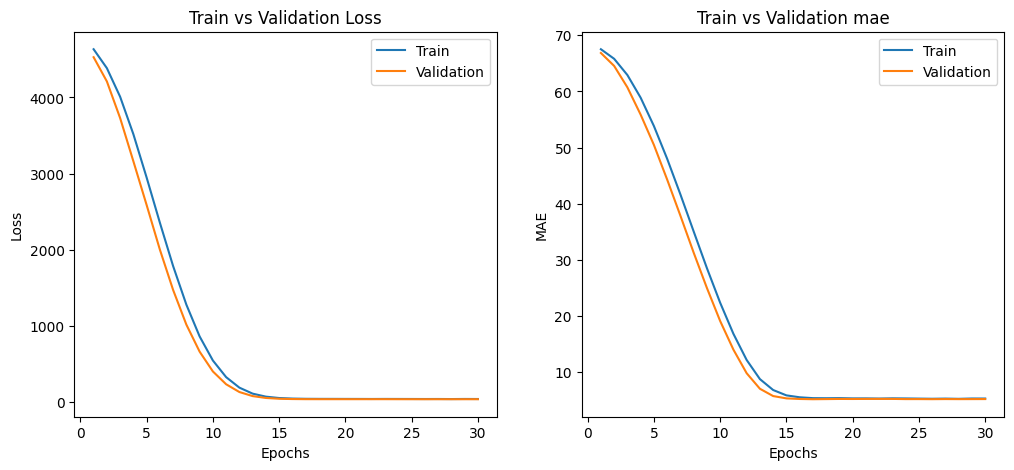

Epoch 1/30
64/64 [==============================] - 2s 7ms/step - loss: 4683.8906 - mae: 67.8342 - val_loss: 4624.9194 - val_mae: 67.4431
Epoch 2/30
64/64 [==============================] - 0s 4ms/step - loss: 4596.7690 - mae: 67.3217 - val_loss: 4520.4341 - val_mae: 66.8123
Epoch 3/30
64/64 [==============================] - 0s 4ms/step - loss: 4477.4248 - mae: 66.5259 - val_loss: 4402.9160 - val_mae: 66.0138
Epoch 4/30
64/64 [==============================] - 0s 4ms/step - loss: 4328.8765 - mae: 65.4343 - val_loss: 4245.1675 - val_mae: 64.8293
Epoch 5/30
64/64 [==============================] - 0s 4ms/step - loss: 4148.6763 - mae: 64.0455 - val_loss: 4030.0251 - val_mae: 63.1530
Epoch 6/30
64/64 [==============================] - 0s 4ms/step - loss: 3936.3450 - mae: 62.3601 - val_loss: 3777.2107 - val_mae: 61.1247
Epoch 7/30
64/64 [==============================] - 0s 4ms/step - loss: 3693.8923 - mae: 60.3807 - val_loss: 3522.2283 - val_mae: 59.0054
Epoch 8/30
64/64 [================

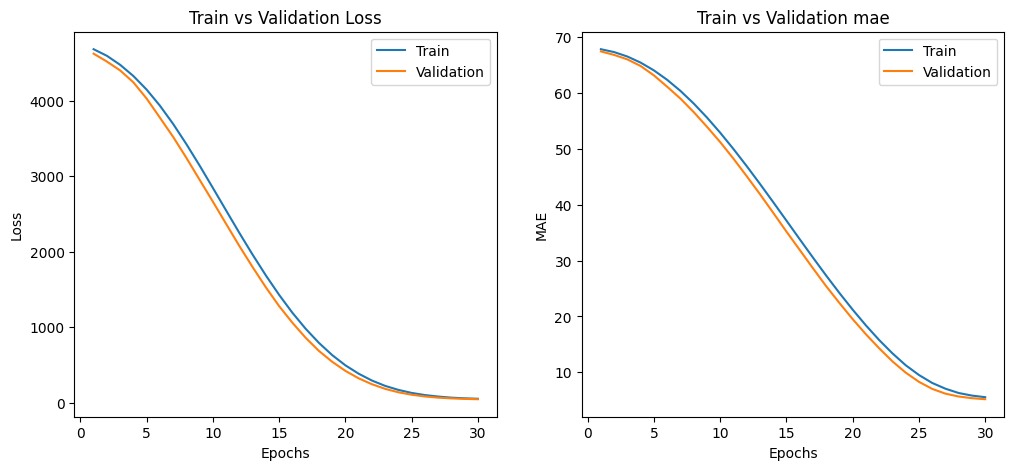

In [ ]:
# Middle size
from tensorflow.keras.layers import Dropout, BatchNormalization
epoch_list = [20,30,30]
BATCH_SIZES = [32, 64, 128]

for i, BATCH_SIZE in enumerate(BATCH_SIZES):
  epochs = epoch_list[i]
  model = Sequential([
    Dense(32, input_shape=(20,) ,activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(16, input_shape=(20,) ,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1, activation='linear')
])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  history = model.fit(
      X_train, y_train,
      epochs=epochs,
      batch_size=BATCH_SIZE,
      validation_split =.1
  )

  import matplotlib.pyplot as plt
  # Record loss and accuracy for train and validation sets
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  train_acc = history.history['mae']
  val_acc = history.history['val_mae']

  # Plot train vs validation loss over each epoch
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, epochs + 1), train_loss, label='Train')
  plt.plot(range(1, epochs + 1), val_loss, label='Validation')
  plt.title('Train vs Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot train vs validation accuracy over each epoch
  plt.subplot(1, 2, 2)
  plt.plot(range(1, epochs + 1), train_acc, label='Train')
  plt.plot(range(1, epochs + 1), val_acc, label='Validation')
  plt.title('Train vs Validation mae')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.legend()

  plt.show()


In [ ]:
r2 = r2_score(y_test, y_pred)

Epoch 1/20
255/255 [==============================] - 4s 6ms/step - loss: 3568.0149 - mae: 58.6694 - val_loss: 1629.8965 - val_mae: 39.7132
Epoch 2/20
255/255 [==============================] - 1s 5ms/step - loss: 549.4283 - mae: 19.5617 - val_loss: 64.4592 - val_mae: 6.1280
Epoch 3/20
255/255 [==============================] - 1s 5ms/step - loss: 73.4412 - mae: 6.8033 - val_loss: 44.8045 - val_mae: 5.3156
Epoch 4/20
255/255 [==============================] - 1s 5ms/step - loss: 65.8193 - mae: 6.4081 - val_loss: 41.6437 - val_mae: 5.2207
Epoch 5/20
255/255 [==============================] - 2s 7ms/step - loss: 61.3126 - mae: 6.2336 - val_loss: 41.4043 - val_mae: 5.2656
Epoch 6/20
255/255 [==============================] - 2s 8ms/step - loss: 58.4840 - mae: 6.0877 - val_loss: 39.6485 - val_mae: 5.1189
Epoch 7/20
255/255 [==============================] - 2s 8ms/step - loss: 55.8059 - mae: 5.9648 - val_loss: 39.7210 - val_mae: 5.1483
Epoch 8/20
255/255 [==============================] - 

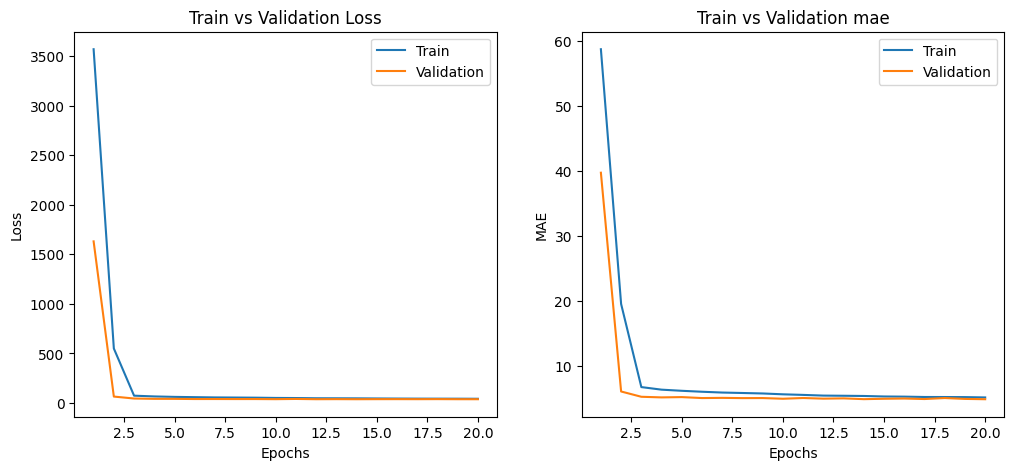

Epoch 1/30
128/128 [==============================] - 3s 9ms/step - loss: 4329.7109 - mae: 65.3812 - val_loss: 3650.4321 - val_mae: 60.0105
Epoch 2/30
128/128 [==============================] - 1s 7ms/step - loss: 2684.2417 - mae: 50.9178 - val_loss: 1570.5692 - val_mae: 39.0835
Epoch 3/30
128/128 [==============================] - 1s 8ms/step - loss: 860.4349 - mae: 27.3700 - val_loss: 289.9583 - val_mae: 15.7130
Epoch 4/30
128/128 [==============================] - 1s 7ms/step - loss: 158.7950 - mae: 10.2301 - val_loss: 53.0492 - val_mae: 5.6364
Epoch 5/30
128/128 [==============================] - 1s 8ms/step - loss: 71.5632 - mae: 6.6854 - val_loss: 41.3405 - val_mae: 5.2029
Epoch 6/30
128/128 [==============================] - 1s 8ms/step - loss: 64.6477 - mae: 6.3371 - val_loss: 40.6633 - val_mae: 5.1950
Epoch 7/30
128/128 [==============================] - 1s 8ms/step - loss: 61.5661 - mae: 6.2324 - val_loss: 40.6844 - val_mae: 5.2149
Epoch 8/30
128/128 [========================

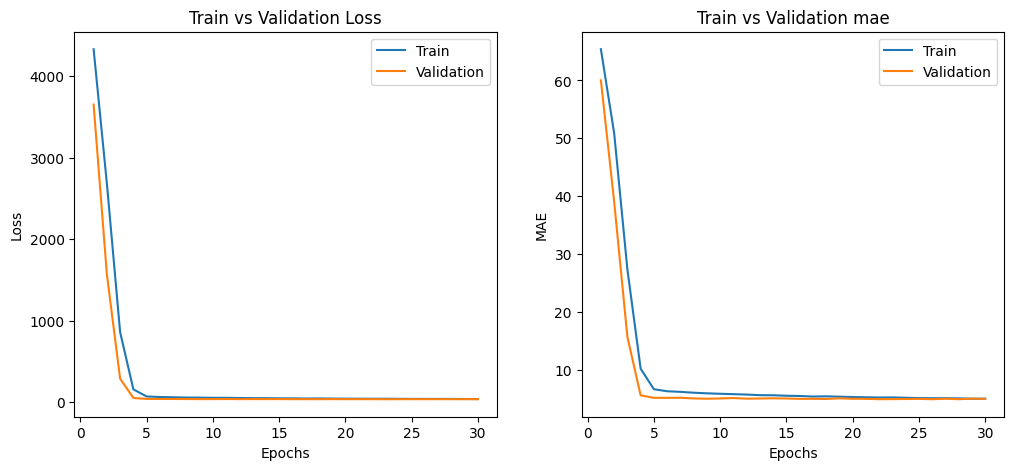

Epoch 1/30
64/64 [==============================] - 4s 18ms/step - loss: 4562.3916 - mae: 67.1743 - val_loss: 4373.3926 - val_mae: 65.6778
Epoch 2/30
64/64 [==============================] - 1s 10ms/step - loss: 4071.4902 - mae: 63.4232 - val_loss: 3642.8291 - val_mae: 59.9115
Epoch 3/30
64/64 [==============================] - 1s 11ms/step - loss: 3186.1338 - mae: 55.9334 - val_loss: 2668.5215 - val_mae: 51.2228
Epoch 4/30
64/64 [==============================] - 1s 10ms/step - loss: 2115.0173 - mae: 45.2721 - val_loss: 1553.1104 - val_mae: 38.8463
Epoch 5/30
64/64 [==============================] - 1s 10ms/step - loss: 1156.2164 - mae: 32.9530 - val_loss: 769.8720 - val_mae: 26.9872
Epoch 6/30
64/64 [==============================] - 1s 10ms/step - loss: 513.9460 - mae: 21.0847 - val_loss: 289.1848 - val_mae: 15.7584
Epoch 7/30
64/64 [==============================] - 1s 10ms/step - loss: 202.1584 - mae: 12.0501 - val_loss: 103.6749 - val_mae: 8.2950
Epoch 8/30
64/64 [===============

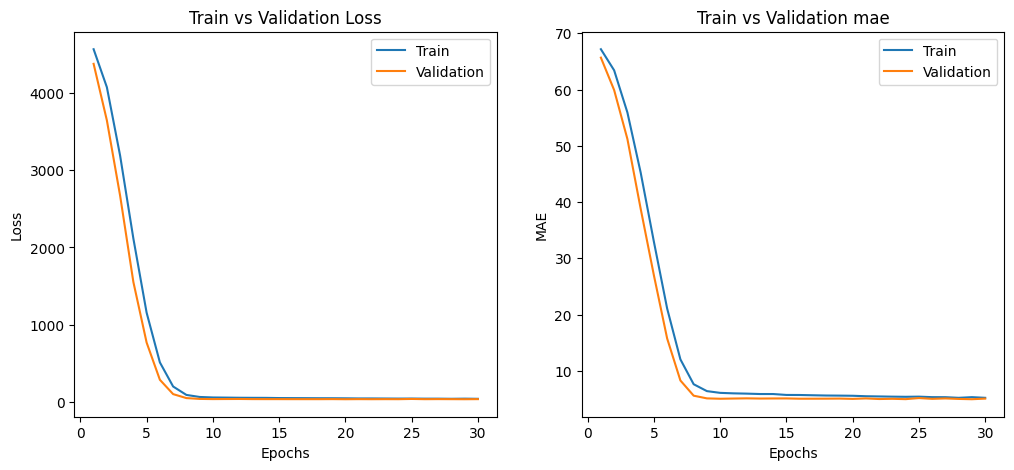

In [ ]:
# Large size
epoch_list = [20,30,30]
BATCH_SIZES = [32, 64, 128]

for i, BATCH_SIZE in enumerate(BATCH_SIZES):
  epochs = epoch_list[i]
  model = Sequential([
    Dense(200, input_shape=(20,) ,activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(200, input_shape=(20,) ,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(200, input_shape=(20,) ,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1, activation='linear')
])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  history = model.fit(
      X_train, y_train,
      epochs=epochs,
      batch_size=BATCH_SIZE,
      validation_split =.1
  )

  import matplotlib.pyplot as plt
  # Record loss and accuracy for train and validation sets
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  train_acc = history.history['mae']
  val_acc = history.history['val_mae']

  # Plot train vs validation loss over each epoch
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, epochs + 1), train_loss, label='Train')
  plt.plot(range(1, epochs + 1), val_loss, label='Validation')
  plt.title('Train vs Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot train vs validation accuracy over each epoch
  plt.subplot(1, 2, 2)
  plt.plot(range(1, epochs + 1), train_acc, label='Train')
  plt.plot(range(1, epochs + 1), val_acc, label='Validation')
  plt.title('Train vs Validation mae')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.legend()

  plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

71/71 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 39.08133072635162
Mean Absolute Error (MAE): 5.04552441367194
Coefficient of Determination (R-squared): 0.5470722159326676
